#### 导入需要的包

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 加载数据集并划分训练集和验证集合

In [237]:
class LinearRegression:
    def __init__(self):
        self.w=None
        
    def train(self,data,label):
        self.w=np.linalg.inv(data.transpose().dot(data)).dot(data.transpose()).dot(label).reshape(-1,1)
        return self.w[:-1],self.w[-1]
    
    def valid(self,data):
        return data.dot(self.w)
    

In [238]:
def loadData(dir):
    data = np.loadtxt(dir)
    return data

In [239]:
data = loadData("./housing_data.txt")
train,test = data[:450],data[450:-1]
train_data,train_label = train[:,:-1],train[:,-1]
test_data,test_label = test[:,:-1],test[:,-1]

#  拼接全1的列向量
temp = np.ones(train.shape[0]).reshape(-1,1)
train_data = np.concatenate((train_data,temp),axis=1)
temp = np.ones(test.shape[0]).reshape(-1,1)
test_data = np.concatenate((test_data,temp),axis=1)

#### 创建模型和拟合

In [240]:
model = LinearRegression()
w,b=model.train(train_data,train_label)
print("w:{}\n b:{}".format(w,b))

w:[[-1.12706397e-01]
 [ 4.84679322e-02]
 [ 3.51619982e-02]
 [ 2.43036682e+00]
 [-1.71555914e+01]
 [ 3.92937664e+00]
 [ 1.05952560e-02]
 [-1.40598405e+00]
 [ 3.72316544e-01]
 [-1.54340774e-02]
 [-9.03360601e-01]
 [ 9.74047349e-03]
 [-5.51630479e-01]]
 b:[34.26122511]


#### 发现大致在同y=x这一条直线的附近，但是方差较大,达到了41点多，所以考虑一下对数据进行正则化

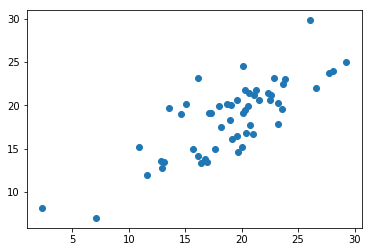

MSE:41.956318473984304


In [241]:
res = model.valid(test_data)
plt.scatter(res,test_label)
plt.show()
print("MSE:{}".format(np.var(res-test_label)))

### 将每个属性压缩到0~1

In [242]:
def normal(data):
    return (data-data.min(0))/(data.max(0)-data.min(0))

In [243]:
data = loadData("./housing_data.txt")
data,label = data[:,:-1],data[:,-1]
data=normal(data)
train_data,train_label=data[:450],label[:450]
test_data,test_label = data[450:],label[450:]
#  拼接全1的列向量
temp = np.ones(train_data.shape[0]).reshape(-1,1)
train_data = np.concatenate((train_data,temp),axis=1)
temp = np.ones(test_data.shape[0]).reshape(-1,1)
test_data = np.concatenate((test_data,temp),axis=1)

In [244]:
w,b=model.train(train_data,train_label)
print("w:{}\n b:{}".format(w,b))

w:[[-10.02747464]
 [  4.84679322]
 [  0.95921931]
 [  2.43036682]
 [ -8.33761743]
 [ 20.50741669]
 [  1.02879936]
 [-15.46146605]
 [  8.56328052]
 [ -8.08745656]
 [ -8.49158965]
 [  3.86287698]
 [-19.99108854]]
 b:[25.25941823]


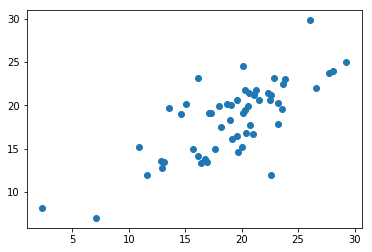

MSE:42.19815228010044


In [245]:
res = model.valid(test_data)
plt.scatter(res,test_label)
plt.show()
print("MSE:{}".format(np.var(res-test_label)))

#### 但是发现这个正则化好像并没有起作用，接下来可以对单个变量的与价格的相关度进行观察

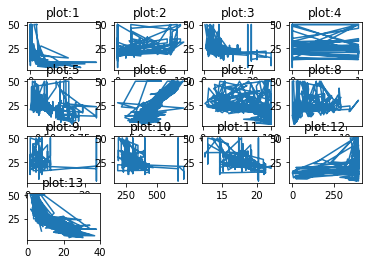

In [246]:
data = loadData("./housing_data.txt")
for i in range(1,data.shape[1]):
    plt.subplot(4,4,i)
    plt.title("plot:{}".format(i))
    plt.plot(data[:,i-1],data[:,-1])
plt.show()

#### 有上面的图可以看出来，第四个，第七个特征对结果来书基本上是杂乱无章的，可以考虑去掉

In [247]:
data = loadData("./housing_data.txt")
data,label = data[:,:-1],data[:,-1]
data = np.delete(data, [3,6], axis=1)
data=normal(data)
train_data,train_label=data[:450],label[:450]
test_data,test_label = data[450:],label[450:]
#  拼接全1的列向量
temp = np.ones(train_data.shape[0]).reshape(-1,1)
train_data = np.concatenate((train_data,temp),axis=1)
temp = np.ones(test_data.shape[0]).reshape(-1,1)
test_data = np.concatenate((test_data,temp),axis=1)

In [248]:
w,b=model.train(train_data,train_label)
print("w:{}\n b:{}".format(w,b))

w:[[-10.69979518]
 [  4.70479648]
 [  1.50326988]
 [ -7.70511938]
 [ 21.1497259 ]
 [-16.1103564 ]
 [  9.06602378]
 [ -8.67871569]
 [ -8.71231634]
 [  4.15761417]
 [-19.77911638]]
 b:[25.45807014]


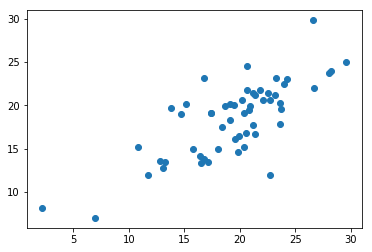

MSE:43.15990038227652


In [249]:
res = model.valid(test_data)
plt.scatter(res,test_label)
plt.show()
print("MSE:{}".format(np.var(res-test_label)))

> 但是好像，并没有和我预想的一样，结果反而更差了，看来还是要多学习，不知道问题在哪里，可能是因为价格没有正则化？
但是对价格也正则化的话需要考虑怎么将预测后的再反向转换回去，看来还是要多学习
~~反向优化，最为致命~~